reference: https://www.youtube.com/watch?v=DbeIqrwb_dE&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=3


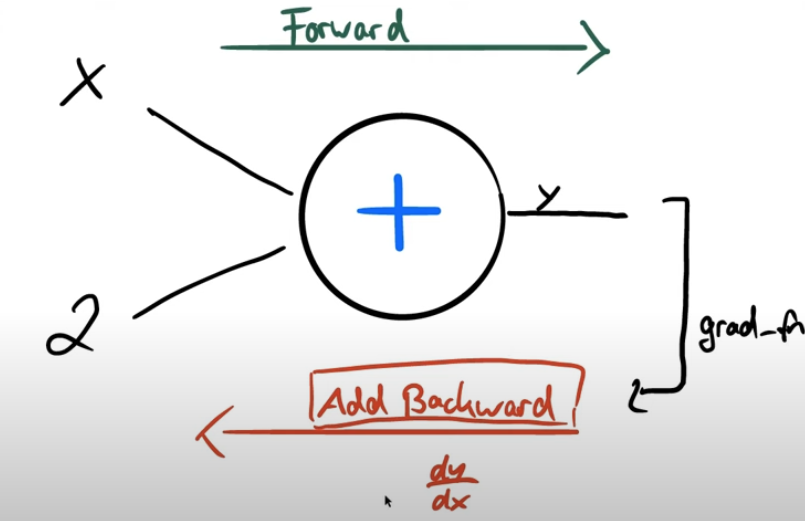

In [1]:
import torch


Scalar Loss:
The backward() function expects a scalar loss value. If your loss is a tensor, you can use loss.sum().backward() to convert it to a scalar.
requires_grad:

In [3]:
# create a random tensor with size (1, 3)
x = torch.randn(3, requires_grad=True)

# calculate gradient of function y = x + 2, z = y * y * 2, z_mean = z.mean()
y = x + 2
z = y * y * 2
z = z.mean()
print(z)

z.backward()
print(x.grad)


tensor(5.4056, grad_fn=<MeanBackward0>)
tensor([1.0829, 3.1058, 1.8964])


Jacobian vector

- 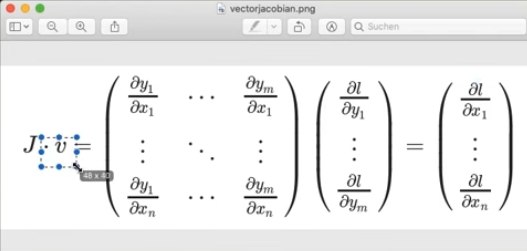


In [ ]:
# calculate gradient of function output = z * v, in which v = tensor([0.1, 0.1, 0.1]), instead of z_mean = z.mean()
y = x + 2
z = y * y * 2
v = torch.tensor([0.1, 0.1, 0.1])

z.backward(v)
print(x.grad) 

In [ ]:
# Stop a tensor from tracking history:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'


# stop tracking gradient history
# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# We need to be careful during optimization
# Use .zero_() to empty the gradients before a new optimization step


In [9]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # a dummy example
    model_output = (weights * 3).sum()
    
    model_output.backward()
    
    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [7]:
# without clearance
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # a dummy example
    model_output = (weights * 3).sum()
    
    model_output.backward()
    
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
